In [670]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin 
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb

# Comparison of Classifiers for Student Performance Prediction
The objective in this assignment is to compare the performance of different classifiers on the Student Performance dataset. What is the best algorithm for the dataset? 

In [671]:
student_data = pd.read_csv('data/data.csv',sep=';')
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Describe the dataset:
This dataset is sourced from a higher education institution and contains information about students enrolled in various undergraduate degree programs. It includes features that provide personal details about the students, such as their marital status, parents education levels, and gender.

Additionally, the dataset includes academic-related information, including the students fields of study, academic performance, and attendance records.

The target variable indicates the state of each student at the end of their course, classifying them as a dropout, still enrolled, or graduated.

The purpose of this dataset is to identify potential patterns between the features and the target variable, aiming to understand the factors that influence whether students drop out, continue their studies, or graduate based on their academic paths and personal and family backgrounds.

From the UCI link where this data is from it looks like they already have performed some preprocessing of the data: removed unexplainable outliers, missing values and anomolies. so we don't have to think about this. The categorical values in the features are already encoded. They are encoded from 1 to however many categories there are. 

https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

# encoding the categorial features correctly:

In [ ]:
label_encoder = LabelEncoder()

student_data['Target'] = label_encoder.fit_transform(student_data['Target'])

student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


# exploratory analysis of the dataset

first we can look at the distribution of the values in the features and target.

array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance\t'}>,
        <Axes: title={'center': 'Previous qualification'}>],
       [<Axes: title={'center': 'Previous qualification (grade)'}>,
        <Axes: title={'center': 'Nacionality'}>,
        <Axes: title={'center': "Mother's qualification"}>,
        <Axes: title={'center': "Father's qualification"}>,
        <Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>],
       [<Axes: title={'center': 'Admission grade'}>,
        <Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational special needs'}>,
        <Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Gender'}>],
   

c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


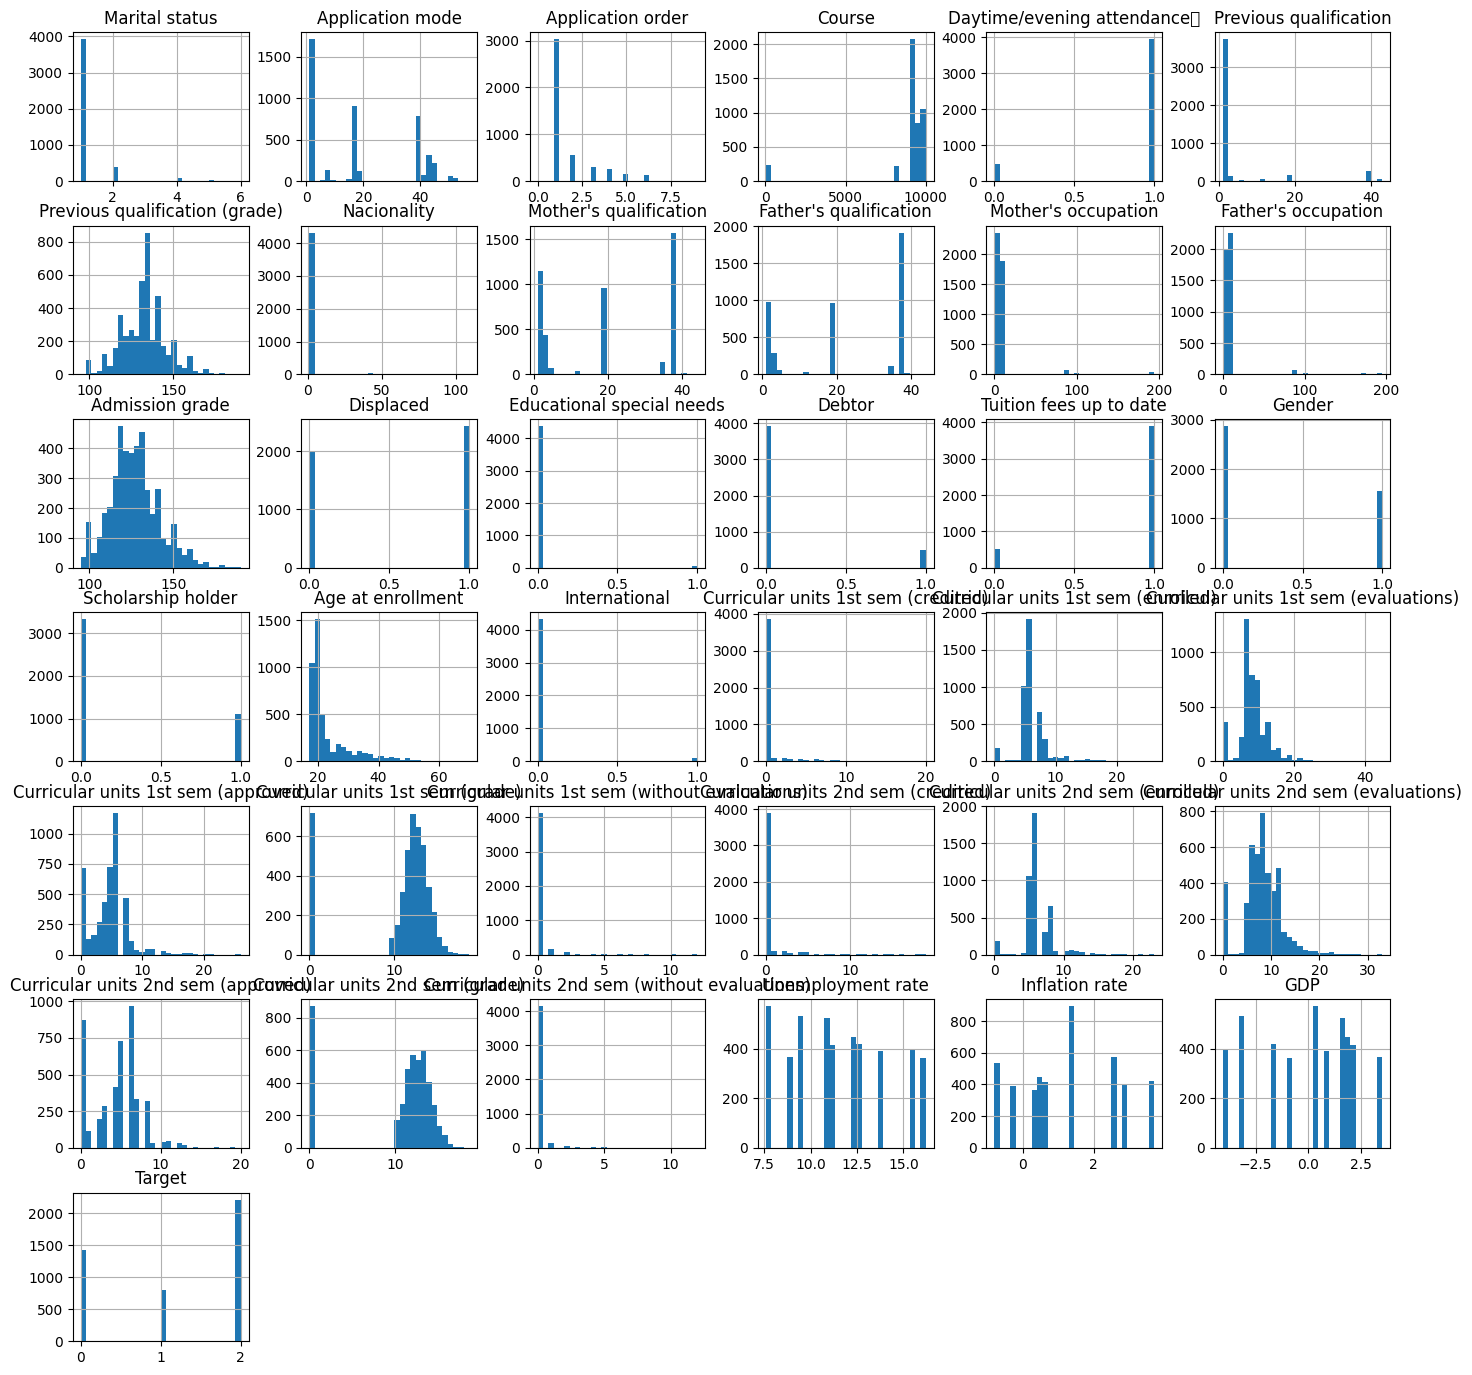

In [674]:
student_data.hist(bins=30, figsize=(17, 17))

# target distribution


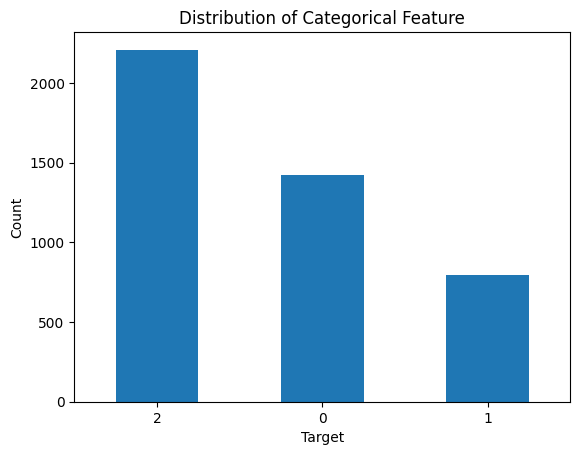

In [675]:
student_data['Target'].value_counts().plot(kind='bar')
plt.title('Distribution of Categorical Feature')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

looking at the distribution of the data we can tell what kind of Algortihms it is best to use.


Looking a the distribution of the data we can see that it is for the most part not normally distributed:  
features:  
target: There is some imbalance here, but it is okey

The info function will tell us

In [676]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [677]:
student_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


Correlation analysis:

In [678]:
student_corr = student_data.corr()
student_corr.style.background_gradient(cmap='coolwarm')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,0.034994,0.031609,-0.004771,-0.234886,-0.028343,0.034304,-0.087158,-0.014738,-0.053765,0.522717,-0.027905,0.061209,0.052107,0.058030,-0.031027,-0.059811,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,-0.089804
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,0.051600,0.036707,-0.013271,-0.301197,-0.030779,0.122818,-0.136262,0.160130,-0.163117,0.516243,0.003438,0.247426,0.164299,0.225938,-0.029055,-0.117741,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743,-0.221747
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,-0.039039,-0.030014,-0.096930,0.332362,0.025597,-0.072151,0.055891,-0.089559,0.073709,-0.271154,-0.028801,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,0.089791
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,0.031265,0.028881,-0.125058,-0.087399,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,-0.026737,-0.096335,0.328461,0.272845,0.180500,0.389349,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265,0.034219
Daytime/evening attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,-0.019067,-0.015477,0.007970,0.251767,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.027973,-0.127466,-0.043056,-0.045889,0.016935,0.063974,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,0.075107
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,0.014822,0.016263,0.184183,-0.115188,-0.010461,0.095104,-0.068453,0.078684,-0.070513,0.156234,-0.026226,0.166025,0.078702,0.130597,0.022020,-0.000497,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069,-0.056039
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,-0.011415,-0.019284,0.580444,-0.011001,-0.001458,-0.037507,0.060578,-0.047874,0.055965,-0.111377,0.048529,-0.008872,-0.029169,-0.070702,0.048410,0.059438,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620,0.103764
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,0.043187,0.020626,0.028176,-0.007448,-0.005982,0.051989,-0.026115,-0.023258,-0.010490,-0.003647,0.790935,-0.000370,-0.013292,-0.007763,-0.002268,0.000869,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478,-0.014801
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,0.076772,0.052329,-0.054412,-0.081176,-0.0215

looking at the correlation between the variables we can see that some of them have very high correlation.  
the correlations we need to consider:  
international and nationality,   
mother and fathers occupation,
and all of the columns for Curricular units 1st sem and Curricular units 2nd sem have some sort of correlation to each other.

ta kolonnene med høy korrelasjon og bruke pca for å slå de sammen.

# pre-processing of data after exploratory analysis:
i will be using pipelines to optimize the transformation of the dataset. Every change i make will be put in the pipe.

# Normalizing the data

In [679]:
normalized = MinMaxScaler()

# Balancing the targets

In [680]:
features = student_data.drop('Target' , axis=1)
smote = SMOTENC(features)

# dimention reduction for the correlated columns
we will be using feature engineering to merge the columns with high correlation together by using PCA.

In [681]:
student_data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

we are going to combine all the curricular columns, which are a lot. We need to find the best number of columns to combine them into.

[0.61612754 0.80979723 0.89631152 0.93060861 0.95837549 0.97615779
 0.9880642  0.99379723 0.99725798 0.99906489 1.        ]


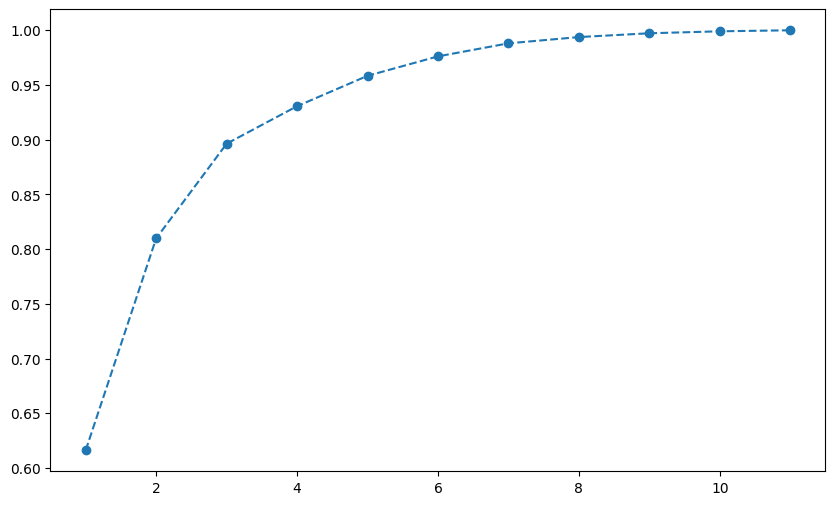

In [682]:
pca = PCA()
number_of_pca = pca.fit_transform(student_data.iloc[:, 21:32])
number_of_pca

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.show()

The other columns i will combine to one, because they only for the most part are two, apart from one that contains three.

In [683]:
pca = ColumnTransformer([
     ("pca1", PCA(1), [7, 20]),        # international and nationality
     ("pca4", PCA(1), [10, 11]),      # mother and fathers occupation
     ("pca5", PCA(3), slice(21, 25)),   # Curricular units 1st sem (credited) to Curricular units 2nd sem (grade)
     ("pca6", PCA(3), slice(27, 31)) 
     ])

# Comebine everything in the pipe

In [684]:
pipe = Pipeline([('normalize',normalized ), ('pca', pca)])

# Split the dataset

In [685]:
features = student_data.drop('Target', axis=1)
targets = student_data['Target']

train_val_features, test_features, train_val_targets, test_targets = train_test_split(features, targets, test_size=0.2)

In [686]:
pipe.fit(train_val_features, train_val_targets)

Pipeline(steps=[('normalize', MinMaxScaler()),
                ('pca',
                 ColumnTransformer(transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca4', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca5', PCA(n_components=3),
                                                  slice(21, 25, None)),
                                                 ('pca6', PCA(n_components=3),
                                                  slice(27, 31, None))]))])

In [687]:
def pipe_normalized_pca(model):
    return Pipeline([('normalized',MinMaxScaler()), ('pca', pca), ('classifier', model)])

# hyperparameter tuning to find the best possible classifiers
i will be using nested cross validation for each algortihm that i am going to test, to make sure that i got the best combination of parameters. to evaluate during the tuning process i will be looking at accuracy, precision, recall, the f-measure and roc auc.

i will be first trying singular models, then ensemble models to see if a combination of models can give me a better result. 

i wil also be testing on the untuched data to see if the preprocessing made the data better better or not.

method to evaluate the models

In [688]:

def evaluate(estimator, X, y):
    probabilities = estimator.predict_proba(X)
    prediction_indices = np.argmax(probabilities, axis=1)
    predictions = estimator.classes_.take(prediction_indices, axis=0)

    return{
        'accuracy': accuracy_score(y, predictions), 
        'precision': precision_score(y, predictions, average='weighted'), 
        'recall': recall_score(y, predictions, average='weighted'), 
        'f1': f1_score(y, predictions, average='weighted'), 
        'roc_auc': roc_auc_score(y, probabilities, multi_class="ovr")
    }

In [689]:
pre = DecisionTreeClassifier()
pre.fit(train_val_features, train_val_targets)
evaluate(pre, test_features, test_targets)

{'accuracy': 0.6892655367231638,
 'precision': 0.703587060384255,
 'recall': 0.6892655367231638,
 'f1': 0.6952826481933635,
 'roc_auc': 0.7429625669900316}

In [690]:
pipe_decision = Pipeline([('normalized',MinMaxScaler()), ('pca', pca), ('classifier', DecisionTreeClassifier())])
pipe_decision.fit(train_val_features, train_val_targets)
evaluate(pipe_decision, test_features, test_targets)

{'accuracy': 0.6621468926553672,
 'precision': 0.6603008834647253,
 'recall': 0.6621468926553672,
 'f1': 0.6609874867757709,
 'roc_auc': 0.707663106062105}

# first round of testing models
for the first round of testing models i will be trying a smaller range of paramtes, so i can try many models without getting a too large runtime

# Singular models

method to find the best singular model using a nested grid search. 

In [ ]:
def find_best_models(model, dt_params):
    metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc_ovr_weighted']

    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
    inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=13)

    dt_cv_results = []
    dt_estimators = []
    dt_test_scores = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'roc_auc': [],
    }

    for (train_index, test_index) in list(outer_cv.split(features, targets)):

        dt_grid = GridSearchCV(model, dt_params, cv=inner_cv, scoring=metrics, refit='f1_weighted',return_train_score=True)
        dt_grid.fit(features.iloc[train_index], targets.iloc[train_index])

        cv_results = pd.DataFrame(dt_grid.cv_results_)
        dt_cv_results.append(cv_results)
        dt_estimators.append(dt_grid.best_estimator_)

        evaluation = evaluate(dt_grid, features.iloc[test_index], targets.iloc[test_index])
        dt_test_scores['accuracy'].append(evaluation['accuracy'])
        dt_test_scores['precision'].append(evaluation['precision'])
        dt_test_scores['recall'].append(evaluation['recall'])
        dt_test_scores['f1'].append(evaluation['f1'])
        dt_test_scores['roc_auc'].append(evaluation['roc_auc'])
    return dt_estimators, dt_cv_results, dt_test_scores



# Decision tree

In [ ]:
dt_params = {
        'criterion': ['gini', 'entropy'], 
        'max_depth': range(1,5)
    }
best_models_decision_tree, cv_results, test_scores = find_best_models(DecisionTreeClassifier(), dt_params)

c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

seeing which model occurs the most

In [693]:
print(best_models_decision_tree)

[DecisionTreeClassifier(max_depth=4), DecisionTreeClassifier(max_depth=4), DecisionTreeClassifier(max_depth=4), DecisionTreeClassifier(max_depth=4), DecisionTreeClassifier(max_depth=4)]


# Decision tree with the altered data

In [ ]:
dt_params = {
        'classifier__criterion': ['gini', 'entropy'], 
        'classifier__max_depth': range(1,5)
    }
best_models_decision_tree_pipe, cv_results, model_scores = find_best_models(pipe_normalized_pca(DecisionTreeClassifier()), dt_params)

c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# 

the best model is

In [695]:
print(best_models_decision_tree_pipe)

[Pipeline(steps=[('normalized', MinMaxScaler()),
                ('pca',
                 ColumnTransformer(transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca4', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca5', PCA(n_components=3),
                                                  slice(21, 25, None)),
                                                 ('pca6', PCA(n_components=3),
                                                  slice(27, 31, None))])),
                ('classifier', DecisionTreeClassifier(max_depth=4))]), Pipeline(steps=[('normalized', MinMaxScaler()),
                ('pca',
                 ColumnTransformer(transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca4', PCA

In [ ]:
nb_params = {
        'var_smoothing':np.logspace(-2, -12, num=11)
    }
best_models_nb, cv_results, model_scores = find_best_models(GaussianNB(), nb_params)

c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [697]:
print(best_models_nb)

[GaussianNB(var_smoothing=1e-08), GaussianNB(var_smoothing=1e-08), GaussianNB(var_smoothing=1e-08), GaussianNB(var_smoothing=1e-08), GaussianNB(var_smoothing=1e-08)]


In [ ]:
nb_params = {
        'classifier__var_smoothing':np.logspace(-2, -12, num=11)
    }
best_models_nb_pipe, cv_results, model_scores = find_best_models(pipe_normalized_pca(GaussianNB()), nb_params)

In [699]:
print(best_models_nb_pipe)

[Pipeline(steps=[('normalized', MinMaxScaler()),
                ('pca',
                 ColumnTransformer(transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca4', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca5', PCA(n_components=3),
                                                  slice(21, 25, None)),
                                                 ('pca6', PCA(n_components=3),
                                                  slice(27, 31, None))])),
                ('classifier', GaussianNB(var_smoothing=1e-05))]), Pipeline(steps=[('normalized', MinMaxScaler()),
                ('pca',
                 ColumnTransformer(transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca4', PCA(n_c

In [ ]:
b_params = {
        'alpha': np.logspace(-4, 0, 5)
    }
best_models_b, cv_results, model_scores = find_best_models(BernoulliNB(), b_params)

In [701]:
print(best_models_b)

[BernoulliNB(alpha=0.0001), BernoulliNB(alpha=0.0001), BernoulliNB(alpha=0.0001), BernoulliNB(), BernoulliNB(alpha=0.0001)]


# results of the best singular models:


In [702]:
print("decision tree: ")
decision_tree_best = DecisionTreeClassifier(max_depth=4).fit(train_val_features, train_val_targets)
print(evaluate(decision_tree_best, test_features, test_targets))
print("Decision tree with pipe")
decision_pipe = pipe_normalized_pca(DecisionTreeClassifier(max_depth=4)).fit(train_val_features, train_val_targets)
print(evaluate(decision_pipe, test_features, test_targets))

print()
print("Naive bayes")
naive_bayes_best = GaussianNB(var_smoothing=1e-08).fit(train_val_features, train_val_targets)
print(evaluate(naive_bayes_best, test_features, test_targets))
print("Naive bayes with pipe with var smooting 05")
nb_pipe = pipe_normalized_pca(GaussianNB(var_smoothing=1e-05)).fit(train_val_features, train_val_targets)
print(evaluate(nb_pipe, test_features, test_targets))
print("Naive bayes with pipe with var smooting 01")
nb_pipe_1 = pipe_normalized_pca(GaussianNB(var_smoothing=1e-01)).fit(train_val_features, train_val_targets)
print(evaluate(nb_pipe_1, test_features, test_targets))
print()

print("best BernoulliNB")
best_b = pipe_normalized_pca(BernoulliNB(alpha=0.0001)).fit(train_val_features, train_val_targets).fit(test_features, test_targets)
print(evaluate(best_b, test_features, test_targets))







decision tree: 
{'accuracy': 0.7570621468926554, 'precision': 0.7460515583947553, 'recall': 0.7570621468926554, 'f1': 0.7384139824452051, 'roc_auc': 0.8640517365197796}
Decision tree with pipe
{'accuracy': 0.6971751412429379, 'precision': 0.654464941859349, 'recall': 0.6971751412429379, 'f1': 0.6433971366387045, 'roc_auc': 0.8545677507823414}

Naive bayes
{'accuracy': 0.6994350282485876, 'precision': 0.6943536554769991, 'recall': 0.6994350282485876, 'f1': 0.6933891839554495, 'roc_auc': 0.8074955331078287}
Naive bayes with pipe with var smooting 05
{'accuracy': 0.7265536723163842, 'precision': 0.7196781748647652, 'recall': 0.7265536723163842, 'f1': 0.7223163024902544, 'roc_auc': 0.838446577580748}
Naive bayes with pipe with var smooting 01
{'accuracy': 0.7107344632768362, 'precision': 0.6823851320500807, 'recall': 0.7107344632768362, 'f1': 0.689381504832814, 'roc_auc': 0.8288900729366242}

best BernoulliNB
{'accuracy': 0.6870056497175141, 'precision': 0.6911940844103125, 'recall': 0.687

# Ensembeled models

# random forest classifier with untuched data

In [ ]:
rfc_params = {
        'n_estimators': [80, 90, 100]
    }
best_models_rfc, cv_results, model_scores = find_best_models(RandomForestClassifier(), rfc_params)

In [704]:
print(best_models_rfc)

[RandomForestClassifier(n_estimators=80), RandomForestClassifier(), RandomForestClassifier(n_estimators=80), RandomForestClassifier(n_estimators=90), RandomForestClassifier()]


In [705]:
best_rfc = RandomForestClassifier(n_estimators=90).fit(train_val_features, train_val_targets)
evaluate(best_rfc,test_features, test_targets)


{'accuracy': 0.7807909604519774,
 'precision': 0.7639398347719095,
 'recall': 0.7807909604519774,
 'f1': 0.7642105469068213,
 'roc_auc': 0.9043492041971741}

# random forest classifier with altered data

In [ ]:
rfc_params = {
        'classifier__n_estimators': [80, 90, 100]
    }
best_models_rfc_pipe, cv_results, model_scores = find_best_models(pipe_normalized_pca(RandomForestClassifier()), rfc_params)

In [707]:
print(best_models_rfc_pipe)

[Pipeline(steps=[('normalized', MinMaxScaler()),
                ('pca',
                 ColumnTransformer(transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca4', PCA(n_components=1),
                                                  [10, 11]),
                                                 ('pca5', PCA(n_components=3),
                                                  slice(21, 25, None)),
                                                 ('pca6', PCA(n_components=3),
                                                  slice(27, 31, None))])),
                ('classifier', RandomForestClassifier(n_estimators=80))]), Pipeline(steps=[('normalized', MinMaxScaler()),
                ('pca',
                 ColumnTransformer(transformers=[('pca1', PCA(n_components=1),
                                                  [7, 20]),
                                                 ('pca4',

In [708]:
rfc = pipe_normalized_pca(RandomForestClassifier()).fit(train_val_features, train_val_targets)
print(evaluate(rfc, test_features, test_targets))

{'accuracy': 0.7435028248587571, 'precision': 0.7300417185196457, 'recall': 0.7435028248587571, 'f1': 0.7342418847767105, 'roc_auc': 0.8639315799154437}


# Combinding models
i will try to combine two models, to see if i can get even better results

In [713]:
class CombinedNB(ClassifierMixin, BaseEstimator):

    def __init__(self, gaussian=GaussianNB(), gaussian_features=None, bernoulli=BernoulliNB(), bernoulli_features=None):
        
        self.gaussian_features = gaussian_features
        self.bernoulli_features  = bernoulli_features
        
        self.gaussian = gaussian 
        self.bernoulli = bernoulli 

    def fit(self, X, y):
        self.gaussian.fit(X[self.gaussian_features], y)
        self.bernoulli.fit(X[self.bernoulli_features], y)
        self.classes_ = self.gaussian.classes_
       
    def predict(self, X):
        predict_proba = self.predict_proba(X)
        return np.argmax(predict_proba, axis=1)

    def predict_proba(self, X):
        gaussian_proba = self.gaussian.predict_proba(X[self.gaussian_features])
        bernoulli_proba = self.bernoulli.predict_proba(X[self.bernoulli_features])
        
        proba = gaussian_proba * bernoulli_proba
        
        
        proba = proba / proba.sum(axis=1, keepdims=True)
        
        return proba


In [714]:
student_data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [715]:
# all binary columns
bernoulli_features = ['Daytime/evening attendance\t', 'Displaced', 
                      'Educational special needs', 'Debtor', 'Tuition fees up to date',
                      'Gender', 'Scholarship holder', 'International']
# the rest
guassian_features = list(filter(lambda x: x not in bernoulli_features, train_val_features.columns))

combined_params = {
        'gaussian__var_smoothing':np.logspace(-2, -12, num=11),
        'bernoulli__alpha': np.logspace(-4, 0, 5)
    }
combined = CombinedNB(gaussian_features=guassian_features, bernoulli_features=bernoulli_features)
combined


CombinedNB(bernoulli_features=['Daytime/evening attendance\t', 'Displaced',
                               'Educational special needs', 'Debtor',
                               'Tuition fees up to date', 'Gender',
                               'Scholarship holder', 'International'],
           gaussian_features=['Marital status', 'Application mode',
                              'Application order', 'Course',
                              'Previous qualification',
                              'Previous qualification (grade)', 'Nacionality',
                              "Mother's qualification",...
                              'Curricular units 1st sem (approved)',
                              'Curricular units 1st sem (grade)',
                              'Curricular units 1st sem (without evaluations)',
                              'Curricular units 2nd sem (credited)',
                              'Curricular units 2nd sem (enrolled)',
                              'Curricular units 2nd sem (evaluations)',
                              'Curricular units 2nd sem (approved)',
                              'Curricular units 2nd sem (grade)',
                              'Curricular units 2nd sem (without evaluations)',
                              'Unemployment rate', 'Inflation rate', 'GDP'])

In [ ]:
best_combined_models, cv, scores = find_best_models(combined, combined_params)

c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [717]:
print(best_combined_models)

[CombinedNB(bernoulli=BernoulliNB(alpha=0.01),
           bernoulli_features=['Daytime/evening attendance\t', 'Displaced',
                               'Educational special needs', 'Debtor',
                               'Tuition fees up to date', 'Gender',
                               'Scholarship holder', 'International'],
           gaussian=GaussianNB(var_smoothing=1e-07),
           gaussian_features=['Marital status', 'Application mode',
                              'Application order', 'Course',
                              'Previous qualifica...
                              'Curricular units 1st sem (approved)',
                              'Curricular units 1st sem (grade)',
                              'Curricular units 1st sem (without evaluations)',
                              'Curricular units 2nd sem (credited)',
                              'Curricular units 2nd sem (enrolled)',
                              'Curricular units 2nd sem (evaluations)',
        

In [719]:
# evalute
best_combined = CombinedNB(gaussian_features=guassian_features, bernoulli_features=bernoulli_features, gaussian=GaussianNB(var_smoothing=1e-07), bernoulli=BernoulliNB(alpha=0.01))
best_combined.fit(train_val_features, train_val_targets)
evaluate(best_combined, test_features, test_targets)

{'accuracy': 0.6926553672316385,
 'precision': 0.676246648628632,
 'recall': 0.6926553672316385,
 'f1': 0.6721270030305077,
 'roc_auc': 0.8093172991269929}

# combined method with altered data

# score of the best combined model:

# second round of finding the best models
for the second round i will take the best models from round one and go more in depth with the parameters. i will make sure that i get the best parameters

the best model was random forest classifier, we will be trying with many more parameters:
the run time got very high for randomforest, so i couldnt test that many parameters, but from the graphs underneath it looks like we got clear peeks from the parameters


In [ ]:
rfc_params = {
    'n_estimators': [75, 90, 100],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 7]  
}
best_models_rfc, cv_results, model_scores = find_best_models(RandomForestClassifier(), rfc_params)

In [ ]:
print(cv_results)

[    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.249314      0.025278         0.022672        0.000922   
1        0.282578      0.002477         0.025988        0.000701   
2        0.324977      0.005815         0.027975        0.001961   
3        0.243375      0.014437         0.022772        0.001242   
4        0.348884      0.044093         0.027425        0.001216   
5        0.317309      0.015285         0.031131        0.004853   
6        0.234895      0.005062         0.023875        0.001758   
7        0.285847      0.022693         0.025667        0.002803   
8        0.373123      0.049756         0.032549        0.005722   
9        0.398413      0.003605         0.033073        0.002914   
10       0.414722      0.026926         0.033535        0.001386   
11       0.480726      0.020973         0.038540        0.003625   
12       0.295041      0.020494         0.026488        0.000887   
13       0.357869      0.017959         0.02749

C:\Users\Kosov\AppData\Local\Temp\ipykernel_28428\2921074383.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.lineplot(data=cv_results_df, x='param_max_depth', y='mean_test_f1_weighted', estimator='mean', ci='sd')
C:\Users\Kosov\AppData\Local\Temp\ipykernel_28428\2921074383.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.lineplot(data=cv_results_df, x='param_n_estimators', y='mean_test_f1_weighted', estimator='mean', ci='sd')
C:\Users\Kosov\AppData\Local\Temp\ipykernel_28428\2921074383.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sb.lineplot(data=cv_results_df, x='param_min_samples_split', y='mean_test_f1_weighted', estimator='mean', ci='sd')


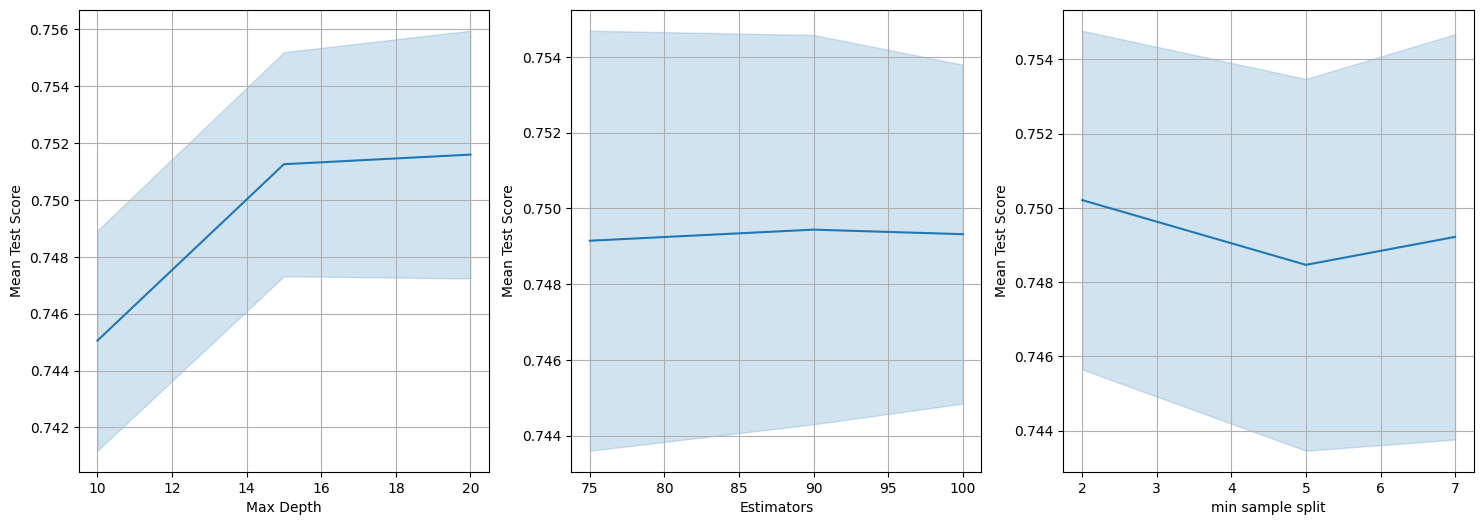

In [ ]:
cv_results_df = pd.concat(cv_results, ignore_index=True)

plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 1)
sb.lineplot(data=cv_results_df, x='param_max_depth', y='mean_test_f1_weighted', estimator='mean', ci='sd')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.grid()

plt.subplot(1, 3, 2)
sb.lineplot(data=cv_results_df, x='param_n_estimators', y='mean_test_f1_weighted', estimator='mean', ci='sd')
plt.xlabel('Estimators')
plt.ylabel('Mean Test Score')
plt.grid()

plt.subplot(1, 3, 3)
sb.lineplot(data=cv_results_df, x='param_min_samples_split', y='mean_test_f1_weighted', estimator='mean', ci='sd')
plt.xlabel('min sample split')
plt.ylabel('Mean Test Score')
plt.grid()

the best models from the grid search

In [ ]:
print(best_models_rfc)

[RandomForestClassifier(max_depth=15), RandomForestClassifier(max_depth=20, min_samples_split=5), RandomForestClassifier(max_depth=15), RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=80), RandomForestClassifier(max_depth=15)]


In [ ]:
evaluate(RandomForestClassifier(max_depth=15).fit(train_val_features, train_val_targets), test_features, test_targets)

{'accuracy': 0.751412429378531,
 'precision': 0.7330078652414369,
 'recall': 0.751412429378531,
 'f1': 0.7300215833293181,
 'roc_auc': 0.8874133962671135}

# evaluating the classifiers
i will finally compare the best estimators i have found of each algortihm by looking at their  accuracy, precision, recall and the f-measure results. i will also display their results visually with [fill this in] so we can clearly see which model is the best. 

# final results of the best estimators:

# Conclusion


# Sources

https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html: pipeline  
https://scikit-learn.org/1.5/modules/generated/sklearn.compose.ColumnTransformer.html:  ColumnTransformer  
https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html randomforest  